### サポートベクトルマシン
離散変数を出力とするクラス識別問題を考える。
#### カーネル最小二乗クラス識別
簡単のためクラス数は2つとして説明する。この場合、一方のクラスに1、他方のクラスに-1という数値をを割り当てれば、これは±1を取る関数とみなせるので、カーネル回帰によってこの関数を近似することができる。
カーネル回帰を使ってこの2値関数をあてはめると、出力としては±1以外にも連続的な値が出てくるので、
$$
y=sgn[f(\boldsymbol{x})]=\left\{\begin{array}{ll}
1&(f(\boldsymbol{x})\geq 1のとき)\\
-1&(f(\boldsymbol{x})< 1のとき)
\end{array}\right.
$$
によって新たな$\boldsymbol{x}$が得られたときのクラスの推定値$y$を計算する。
$sgn$の中の$f(\boldsymbol{x})$は識別関数と呼ばれる。
ここで、$f(\boldsymbol{x})=\boldsymbol{w}^T\boldsymbol{\phi}(\boldsymbol{x})$という特徴ベクトルに対する線形の識別問題を考えると、
$f(\boldsymbol{x})=0$という超平面で特徴ベクトルの空間を2分割し、一方に-1、もう一方に1を割り当てることに対応する。
#### サポートベクトルマシン
クラス識別では、損失関数として正しい出力$y(=±1)$と学習した出力値$sgn[f(\boldsymbol{x})]$との誤差である誤識別関数
$$
r_{misclass}(f(\boldsymbol{x}),y)=\biggl(\frac{y-sgn[f(\boldsymbol{x})]}{2} \biggr)^2=\frac{1-ysgn[f(\boldsymbol{x})]}{2}=\frac{1-sgn[yf(\boldsymbol{x})]}{2}
$$
を取るのが自然である。
$r_{misclass}$の問題点は、これが凸関数ではないことである。
凸関数でない損失関数は一般に局所最適解を複数持つための最適化が難しい。
そこで凸関数の中で、$r_{misclass}$にできるだけ近い関数として、
$$
r_{hinge}(yf(\boldsymbol{x}))=\max\{0,1-f(\boldsymbol{x})\}
$$
というものを考える。
最小二乗誤差の代わりに$r_{hinge}$を用いるのがサポートベクトルマシン(SVM)である。

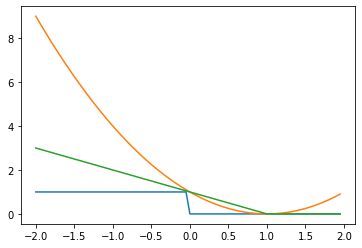

In [4]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(-2,2,0.05)

Rmisclass = (1-np.sign(x))/2
Rsquare = (1-x)**2
Rhinge = 1-x
Rhinge[Rhinge<0] = 0

plt.plot(x, Rmisclass)
plt.plot(x, Rsquare)
plt.plot(x, Rhinge)

#### 線形製薬問題への変換
$f(\boldsymbol{x})$は、
$$
f(\boldsymbol{x})=\sum_{i=1}^n\alpha_ik(\boldsymbol{x}^{(i)},\boldsymbol{x})
$$
と書けるので、
$$
\min_{\boldsymbol{\alpha}}\sum_{i=1}^nr_{hinge}(y^{(i)}f(\boldsymbol{x}^{(i)}))+\frac{\lambda}{2}\boldsymbol{\alpha}^TK\boldsymbol{\alpha}
$$
という最小化問題を解けばよい。これは凸関数であるので最適解は1つしかない。
一般に数理最適化の分野では、線形制約式を複数並べて1次件数や2次関数を最適化するという定式化を行う。
1次関数なら線形計画問題、凸な2次関数のときは凸二次計画問題と呼ばれる。
そこで、今回の最適化関数を凸二次計画問題に変形する。
サンプル$\boldsymbol{x}^{(i)},y^{(i)}$に対する$r_{hinge}$関数の値を$\xi_i$とすると、$\xi_i$は区分線形関数を構成する二つの直線の方程式に対応する不等式
$$
\xi_i\geq0,\hspace{5mm}\xi_i\geq 1- y^{(i)}f(\boldsymbol{x}^{(i)})=1-y^{(i)}\sum_{j=1}^n\alpha_iK_{ij}
$$
の両方を同時に満たす$\xi_i$のうちで最少となる値であることがわかる。
ここで、$K_{ij}$はグラム行列の$i,j$成分、$K_{ij}=k(\boldsymbol{x}^{(i)},\boldsymbol{x}^{(j)})$である。
今回の問題は
$$
\min_{\boldsymbol{\xi},\boldsymbol{\alpha}}\sum_{i=1}^n\xi_i+\frac{\lambda}{2}\boldsymbol{\alpha}^TK\boldsymbol{\alpha}
$$
という$\boldsymbol{\xi}=(\xi_1,\cdots,\xi_n)^T$と$\boldsymbol{\alpha}$に関する2次関数の最小化問題、すなわち凸二次計画問題を解くことに帰着できる。

#### 解の条件とスパース性
#### ラグランジュの未定乗数法
上で導いた制約付き最適化問題は、ラグランジュの未定乗数$\beta_i,\gamma_i(i=1,\cdots,n)$を導入し、
$$
L(\boldsymbol{\xi},\boldsymbol{\alpha},\boldsymbol{\beta},\boldsymbol{\gamma})=\sum_{i=1}^n\xi_i+\frac{\lambda}{2}\boldsymbol{\alpha}^TK\boldsymbol{\alpha}-\sum_{i=1}\beta_i\xi_i-\sum_{i=1}^n\gamma_i(\xi_i-1+y^{(i)}\sum_{j=1}^n\alpha_jK_{ij})
$$
というラグランジュ関数の$\boldsymbol{\xi},\boldsymbol{\alpha},\boldsymbol{\beta},\boldsymbol{\gamma}$に関する極値問題となる。
制約条件は不等式で満たされるので、ラグランジュ乗数は$\beta_i\geq0,\gamma_i\geq0$を満たす。
一般に制約付きの凸最適化問題の解が満たす条件をラグランジュ関数によって述べたのが次の**カルーシュ-キューン-タッカー定理**である。

$m$個の不等式制約を持つ最適化問題
$$
\min_{\boldsymbol{x}}f(\boldsymbol{x}),\hspace{5mm}g_i(\boldsymbol{x})\leq0,\hspace{3mm}i=1,\cdots,m
$$
において、$f,g_i$は微分可能な凸関数であるとする。ラグランジュ関数を
$$
L(\boldsymbol{x},\boldsymbol{\lambda})=f(\boldsymbol{x})+\sum_{i=1}^m\lambda_ig_i(\boldsymbol{x})
$$
とおき、ある制約条件を満たすと仮定する。
$$
\nabla L(\boldsymbol{x^*},\boldsymbol{\lambda^*})=\nabla f(\boldsymbol{x^*})+\sum_{i=1}^m\lambda_i^*\nabla g_i(\boldsymbol{x^*})=0\\
\lambda^*\geq0,\hspace{3mm}g_i(\boldsymbol{x^*})\leq0,\hspace{3mm}\lambda_i^*g_i(\boldsymbol{x^*})=0,\hspace{3mm}i=1,\cdots,m
$$
を満たす$\boldsymbol{x^*},\boldsymbol{\lambda^*}$が存在することと、$\boldsymbol{x^*}$が最適化問題の大域的最適解であることは等価である。
また、これらの条件をカルーシュ-キューン-タッカー条件(KKT条件)と呼ぶ。


KKT条件の式は大域的最適解がラグランジュ関数の極致として与えられることを意味する。
$\lambda_i^*g_i(\boldsymbol{x^*})=0$は、最適解において$\lambda_i^*$が0であるか、不等式制約が等式で満たされる$g_i(\boldsymbol{x^*})$のどちらかが満たされることを主張している。この条件を特に相補性条件という。

#### スパース性
ラグランジュ関数を$\alpha_i$で微分して0とおく。
$$
\sum_{j=1}^n(\lambda K_{ij}\alpha_j-\gamma_jy^{(j)}K_{ji})=0,\hspace{5mm}i=1,\cdots,n
$$
$K$の対称性より$K_{ij}=K_{ji}$なので、この式は、
$$
\lambda K\boldsymbol{\alpha}-K\boldsymbol{\hat{\gamma}}=\boldsymbol{0}
$$
という行列とベクトルの形で書ける。
ただし、
$$
\boldsymbol{\hat{\gamma}}=(\hat{\gamma_1},\cdots,\hat{\gamma_n})^T,\hspace{5mm}\hat{\gamma_i}=\gamma_iy^{(i)},\hspace{5mm}i=1,\cdots,n
$$
$K$が正則であると仮定し、左から$K^{-1}$を掛けると$\boldsymbol{\alpha}=\boldsymbol{\hat{\gamma}}/\lambda$なので、
$$
\alpha_i=\frac{1}{\lambda}\gamma_iy^{(i)}
$$
が得られる。
相補性条件から$\alpha\neq0$となり得るのは、$\xi_i=1-y^{(i)}f(\boldsymbol{x}^{(i)})$となるサンプルだけである。
$\alpha_i\neq0$となるサンプル$\boldsymbol{x}^{(i)}$のことをサポートベクトルと呼ぶ。
$f(\boldsymbol{x})$はサポートベクトルの集合$SV$だけを使って、
$$
f(\boldsymbol{x})=\sum_{\boldsymbol{x}^{(i)}\in SV}\alpha_ik(\boldsymbol{x}^{(i)},\boldsymbol{x})
$$
と書くことができる。
#### 双対問題による計算の単純化
まず、ラグランジュの未定乗数を固定したときラグランジュ関数の最小値を求めるために、$\alpha_i,\xi_i$で微分して0とおく。
$\alpha_i$についてはすでに導かれている。一方、$\xi_i$に関しては1次式だから、その係数が0でないとき、つまり
$$
1-\beta_i-\gamma_i\neq0
$$
のとき、$\xi_i$に関しては$L$はいくらでも小さくできる。
双対問題を考えるときには、
$$
1-\beta_i-\gamma_i=0
$$
という制約が入った場合のみ考えればよい。
ラグランジュ関数の中で1次式となっている変数についてはその係数が0となり、サポートベクトルマシンの場合、双対問題は$\xi_i$とは無関係になる。
結果として、双対問題において最大化する関数$L_{dual}(\boldsymbol{\beta},\boldsymbol{\gamma})$は、
$$
L_{dual}(\boldsymbol{\beta},\boldsymbol{\gamma})=\sum_{i=1}^n\gamma_i-\frac{1}{2\lambda}\sum_{i=1}^n\sum_{j=1}^ny^{(i)}y^{(j)}\gamma_i\gamma_jK_{ij}
$$
であり、$\boldsymbol{\beta}$によらない。
また、$1-\beta_i-\gamma_i=0$という制約条件は$\beta_i,\gamma_i$が0以上という条件から、$\beta_i$を使わずに、
$$
0\leq\gamma_i\leq1
$$
と書き表すことができる。

以上のアルゴリズムをまとめると以下のようになる。
1. サンプル$\boldsymbol{x}^{(1)},\cdots,\boldsymbol{x}^{(n)}$からグラム行列$K_{ij}$を計算する
2. $L_{dual}$を$0\leq\gamma_i\leq1$の制約下で最適化する凸二次計画問題を解き、$\boldsymbol{\gamma}=(\gamma_i,\cdots,\gamma_n)^T$を求める
3. 識別関数
$$
f(\boldsymbol{x})=\frac{1}{\lambda}\sum_{\boldsymbol{x}^{(i)}\in SV}\gamma_iy^{(i)}k(\boldsymbol{x}^{(i)},\boldsymbol{x})
$$
を求める。



vxoptでは以下の形の式を最適化してくれます．

minimize 12xTPx+qTxGx<hAx=b
要するに等式条件と不等式条件を考慮することができます．
この式のPP, qq, GG, hh, AA, bb を当てはめると，

P=KYq=−1G=[I,−I]h=[C1,0]A=Yb=0
ただし[A,B][A,B]は行列A,BA,Bをたてに連結する操作をあらわします．また，CCは（スカラの）ハイパーパラメータで， KK は k(xi,xj)k(xi,xj) をならべた行列です．

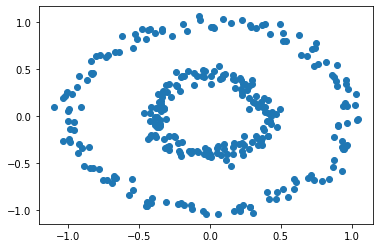

In [124]:
from sklearn.datasets import make_circles

X, Y = make_circles(n_samples=300,
                    shuffle=True,
                    noise=0.05,
                    factor=0.4)

Y = np.array([1 if y==1 else -1 for y in Y])

plt.scatter(X[:,0], X[:,1]);

In [6]:
import numpy as np

def rbf(x1, x2, beta):
    return np.exp(-beta*((x1-x2).T@(x1-x2)))

def polynomial(x1, x2, c, p):
    return (x1@x2.T+c)**p

def Kernel(x1, x2, kernel, **param):
    return np.array([[kernel(x1=xx1, x2=xx2, **param) for xx2 in x2] for xx1 in x1])

https://qiita.com/thtitech/items/1be4d19ced4f8355ba22

In [160]:
import cvxopt as cv

C = 1.0
eps = 10**(-7)

gram_matrix = Kernel(X, X, rbf, beta=1)
N = len(X)

T = np.array([[Y[i] * Y[j] for j in range(N)] for i in range(N)])
P = gram_matrix * T
P = cv.matrix(P)

q = cv.matrix(-np.ones(N))
G = cv.matrix(np.r_[np.identity(N), -np.identity(N)])
h = cv.matrix(np.r_[C*np.ones(N).T, np.zeros(N).T])

A = cv.matrix(np.array([Y], dtype="double"))
b = cv.matrix(0.0)

sol = cv.solvers.qp(P, q, G=G, h=h, A=A, b=b)
#print(len(list(filter(lambda x: x > eps, sol["x"]))))

index_list = list(filter(lambda x: sol["x"][x] > eps, range(N)))
w = np.array(sol["x"])[index_list].reshape(len(index_list)) * Y[index_list]
#print(np.array(sol["x"]).shape)
#print(w)
support_vector = X[index_list]
# calc b
tmp_list = []
for i in index_list:
    tmp = 0    
    for j in index_list:
        tmp += (sol["x"][j] * Y[j] * gram_matrix[i][j])
    tmp_list.append(Y[i]-tmp)
b = np.mean(tmp_list)

     pcost       dcost       gap    pres   dres
 0: -8.0431e+00 -4.1672e+02  2e+03  2e+00  1e-15
 1:  2.7431e+00 -1.7556e+02  2e+02  1e-02  9e-16
 2: -6.8916e+00 -3.3865e+01  3e+01  1e-03  8e-16
 3: -9.2801e+00 -2.0852e+01  1e+01  4e-04  7e-16
 4: -1.0516e+01 -1.6965e+01  6e+00  2e-04  7e-16
 5: -1.1402e+01 -1.5044e+01  4e+00  8e-05  8e-16
 6: -1.2036e+01 -1.3545e+01  2e+00  2e-05  9e-16
 7: -1.2249e+01 -1.2974e+01  7e-01  2e-06  1e-15
 8: -1.2469e+01 -1.2671e+01  2e-01  6e-16  1e-15
 9: -1.2550e+01 -1.2571e+01  2e-02  1e-15  1e-15
10: -1.2560e+01 -1.2560e+01  6e-04  9e-16  1e-15
11: -1.2560e+01 -1.2560e+01  9e-06  2e-15  1e-15
Optimal solution found.


In [199]:
xx, yy = np.meshgrid(np.arange(-1.2,1.2, 0.05), np.arange(-1.2,1.2, 0.05))
xy = np.concatenate([xx.ravel().reshape(-1,1), yy.ravel().reshape(-1,1)], axis=1)

pred = np.dot(np.array([w]), Kernel(xy, support_vector, rbf, beta=1).T) + b
pred_proba = pred.reshape(len(xy))
pred = np.array([1 if p>=0 else -1 for p in pred_proba])

In [200]:
pred_train = np.dot(np.array([w]), Kernel(X, support_vector, rbf, beta=1).T) + b
pred_proba_train = pred_train.reshape(len(X))
pred_train = [1 if p>=0 else -1 for p in pred_proba_train]

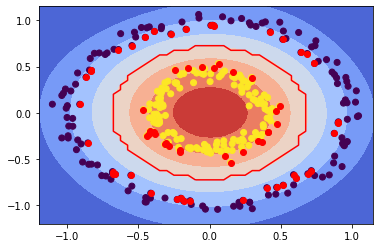

In [201]:
plt.contourf(xx,yy,pred_proba.reshape(len(xx), len(yy)), cmap='coolwarm')
plt.contour(xx,yy,pred.reshape(len(xx), len(yy)), levels=[0,1], colors='red');
plt.scatter(X[:,0], X[:,1], c=pred_train);
plt.plot(support_vector[:,0], support_vector[:,1], 'o', color='red')

In [202]:
from sklearn.svm import SVC

svc = SVC(C=1.0, kernel='rbf', gamma='auto', probability=True)
svc.fit(X ,Y)

pred_svc_train = svc.predict(X)
pred_svc = svc.predict(xy)

pred_proba_svc = svc.decision_function(xy)

SV = svc.support_vectors_

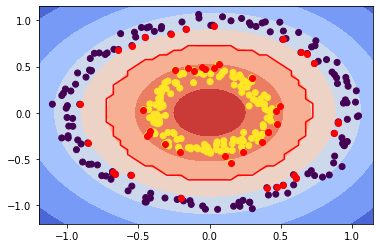

In [203]:
plt.contourf(xx,yy,pred_proba_svc.reshape(len(xx), len(yy)), cmap='coolwarm')
plt.contour(xx,yy,pred_svc.reshape(len(xx), len(yy)), levels=[0,1], colors='red');
plt.scatter(X[:,0], X[:,1], c=pred_svc_train);
plt.plot(SV[:,0], SV[:,1], 'o', color='red')

### サポートベクトル回帰
#### 二乗誤差からε-不感応関数へ
目標値$y$と関数の出力$f(\boldsymbol{x})$との違い$z=y-f(\boldsymbol{x})$を2乗にすれば最小二乗誤差となるが、それを次のような区分線形関数に置き換えて考える。
$$
r_\varepsilon(z)=\left\{
\begin{array}{ll}
z-\varepsilon & (\varepsilon \leq z) \\
0 & (-\varepsilon \leq z < \varepsilon) \\
-z-\varepsilon & (z < -\varepsilon)
\end{array}
\right.
$$
これは、$\varepsilon$以下の誤差は損失に加えないという点と、二乗誤差に比べて損失の増え方が緩やかなので外れ値に対してロバストであるという点が特徴である。$r_\varepsilon$はε-不感応関数と呼ばれる。
カーネル回帰において二乗誤差の代わりにε-不感応関数を使って関数近似をするのがサポートベクトル回帰(SVR)である。


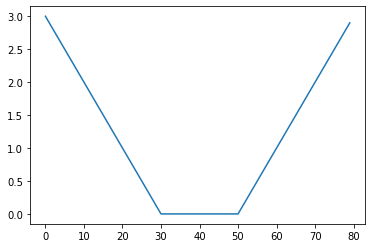

In [208]:
epsilon = 1

z = np.arange(-4,4,0.1)
r = np.abs(z)-epsilon
r[r<0] = 0

plt.plot(r)

サポートベクトル回帰では3個の制約条件で損失関数を記述する。
すなわち、$\xi_i=r_\varepsilon(y^{(i)}-f(\boldsymbol{x}^{(i)}))$とおいたとき、$\xi_i$は以下の3つを同時に満たすものの最小値である。
$$
\xi_i\geq y^{(i)}-f(\boldsymbol{x}^{(i)})-\varepsilon,\hspace{5mm}\xi_i\geq0,\hspace{5mm}\xi_i\geq -(y^{(i)}-f(\boldsymbol{x}^{(i)}))-\varepsilon,\hspace{3mm}i=1,\cdots,n
$$
2次の正則化を入れて損失関数を書くと、サポートベクトルマシンの場合と同じく、
$$
\min_{\boldsymbol{\xi},\boldsymbol{\alpha}}\sum_{i=1}^n\xi_i+\frac{\lambda}{2}\boldsymbol{\alpha}^TK\boldsymbol{\alpha}
$$
を上記の制約下で解くというのがサポートベクトル回帰の凸2次計画問題としての表現である。

#### 双対問題の導出
ラグランジュ関数は3つの制約式に対応する$\beta_i,\gamma_i^+,\gamma_i^-$という3種類のラグランジュ乗数を使って
$$
L(\boldsymbol{\xi},\boldsymbol{\alpha},\boldsymbol{\beta},\boldsymbol{\gamma^+},\boldsymbol{\gamma^-})=\sum_{i=1}^n\xi_i+\frac{1}{2}\lambda\boldsymbol{\alpha}^TK\boldsymbol{\alpha}-\sum_{i=1}^n\beta_i\xi_i-\sum_{i=1}^n\gamma_i^+(\xi_i+\varepsilon-y^{(i)}+\sum_{j=1}^n\alpha_iK_{ij})-\sum_{i=1}^n\gamma_i^-(\xi_i+\varepsilon-y^{(i)}-\sum_{j=1}^n\alpha_iK_{ij})
$$
と書ける。これをまず$\alpha_i$で微分すると、
$$
\alpha_i=\frac{1}{\lambda}(\gamma_i^+-\gamma_i^-)
$$
となり、$\xi_i$については1次式なのでその係数は0で
$$
1-\beta_i-\gamma_i^+-\gamma_i^-=0
$$
としてよい。
これら二つの式を$L$に代入すると$\boldsymbol{\gamma^+},\boldsymbol{\gamma^-}$に対する最適化問題として、
$$
L_{dual}(\boldsymbol{\gamma^+},\boldsymbol{\gamma^-})=-\frac{1}{2\lambda}\sum_{i,j}(\gamma_i^+-\gamma_i^-)(\gamma_j^+-\gamma_j^-)K_{ij}-\sum_{i=1}^n\gamma_i^-(y^{(i)}+\varepsilon)-\sum_{i=1}^n\gamma_i^+(-y^{(i)}+\varepsilon)
$$
の最大化問題に帰着される。
これはやはり$\beta_i$には依存せず、制約式も$\beta_i$を使わず
$$
0\leq \gamma_i^+ + \gamma_i^- \leq 1
$$
と書くことができる。
求められた$\gamma_i^+,\gamma_i^-$から、サポートベクトル回帰で求めたい関数
$$
f(\boldsymbol{x})=\frac{1}{\lambda}\sum_{\boldsymbol{x}^{(i)}\in SV}(\gamma_i^+-\gamma_i^-)k(\boldsymbol{x}^{(i)},\boldsymbol{x})
$$
を得る。


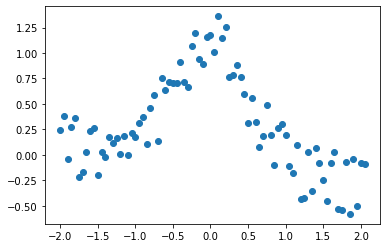

In [258]:
from scipy.stats import norm

x1 = np.arange(-2,2.1,0.05)
y = -0.1*x1-0.4 + norm.pdf(x1*2)*3 + np.random.rand(len(x1))*0.6
plt.plot(x1,y,'o')

In [263]:
from sklearn.svm import SVR

eps = 0.1

svr = SVR(C=1, kernel='rbf', gamma=1, epsilon=eps)
svr.fit(x1.reshape(-1,1), y)
pred = svr.predict(x1.reshape(-1,1))

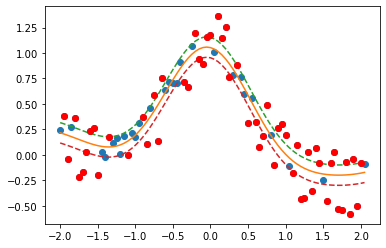

In [264]:
plt.plot(x1,y,'o')
plt.plot(x1,pred)
plt.plot(x1,pred+eps, '--')
plt.plot(x1,pred-eps, '--')
plt.plot(x1[svr.support_], y[svr.support_], 'o', color='red')

In [262]:
?SVC